In [7]:
#disabe annoying warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score, reciprocal_rank
from scipy.sparse import coo_matrix
import numpy as np
import joblib 
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [8]:
file_path = '/Users/giulia/Desktop/tesi/mind_small15/mind_small15.inter'
data = pd.read_csv(file_path, sep='\t', header=0, names=['user_id', 'item_id', 'label'])

In [9]:
dataset = Dataset()
dataset.fit((x.user_id for x in data.itertuples()), 
            (x.item_id for x in data.itertuples()))
# dataset.fit_partial(items=(x.item_feature for x in data.itertuples()),            #for user/item features, later
#                     users=(x.user_feature for x in data.itertuples()))
(interactions, weights) = dataset.build_interactions(((x.user_id, x.item_id, x.label) for x in data.itertuples()))

train, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
#int matrices
train_interactions, _ = dataset.build_interactions(((x.user_id, x.item_id, x.label) for x in train.itertuples()))
val_interactions, _ = dataset.build_interactions(((x.user_id, x.item_id, x.label) for x in val.itertuples()))
test_interactions, _ = dataset.build_interactions(((x.user_id, x.item_id, x.label) for x in test.itertuples()))


#@TO-DO:
#    save the interactions in a file


# feat
# user_features = dataset.build_user_features((x.user_id, [x.user_feature]) for x in data.itertuples())
# item_features = dataset.build_item_features((x.item_id, [x.item_feature]) for x in data.itertuples())

In [4]:
model = LightFM(no_components=80, learning_rate=0.01, loss='bpr')
num_epochs = 10

for epoch in tqdm(range(num_epochs)):
    
    model.fit_partial(train_interactions, epochs=1)

    train_auc = auc_score(model, train_interactions).mean()
    train_precision = precision_at_k(model, train_interactions, k=5).mean()
    train_recall = recall_at_k(model, train_interactions, k=5).mean()
    train_rr = reciprocal_rank(model, train_interactions).mean()

    val_auc = auc_score(model, val_interactions).mean()
    val_precision = precision_at_k(model, val_interactions, k=5).mean()
    val_recall = recall_at_k(model, val_interactions, k=5).mean()
    val_rr = reciprocal_rank(model, val_interactions).mean()

    print(f'Epoch {epoch}: \nTrain AUC {train_auc:.2f}, Train Precision {train_precision:.2f}, Train Recall {train_recall:.2f}, Train RR {train_rr:.2f},\nVal AUC {val_auc:.2f}, Val Precision {val_precision:.2f}, Val Recall {val_recall:.2f}, Val RR {val_rr:.2f}')
    


 10%|█         | 1/10 [29:08<4:22:13, 1748.20s/it]

Epoch 0: 
Train AUC 0.69, Train Precision 0.18, Train Recall 0.02, Train RR 0.29,
Val AUC 0.68, Val Precision 0.07, Val Recall 0.02, Val RR 0.16


 20%|██        | 2/10 [58:23<3:53:40, 1752.56s/it]

Epoch 1: 
Train AUC 0.75, Train Precision 0.31, Train Recall 0.03, Train RR 0.51,
Val AUC 0.73, Val Precision 0.12, Val Recall 0.03, Val RR 0.27


 30%|███       | 3/10 [1:26:55<3:22:15, 1733.70s/it]

Epoch 2: 
Train AUC 0.82, Train Precision 0.34, Train Recall 0.03, Train RR 0.54,
Val AUC 0.80, Val Precision 0.13, Val Recall 0.04, Val RR 0.29


 40%|████      | 4/10 [1:54:01<2:49:08, 1691.45s/it]

Epoch 3: 
Train AUC 0.86, Train Precision 0.37, Train Recall 0.04, Train RR 0.58,
Val AUC 0.84, Val Precision 0.14, Val Recall 0.04, Val RR 0.30


 50%|█████     | 5/10 [2:19:38<2:16:18, 1635.69s/it]

Epoch 4: 
Train AUC 0.88, Train Precision 0.39, Train Recall 0.04, Train RR 0.61,
Val AUC 0.86, Val Precision 0.15, Val Recall 0.04, Val RR 0.32


 60%|██████    | 6/10 [2:44:58<1:46:24, 1596.19s/it]

Epoch 5: 
Train AUC 0.89, Train Precision 0.41, Train Recall 0.05, Train RR 0.64,
Val AUC 0.87, Val Precision 0.15, Val Recall 0.05, Val RR 0.33


 70%|███████   | 7/10 [3:09:08<1:17:25, 1548.61s/it]

Epoch 6: 
Train AUC 0.89, Train Precision 0.43, Train Recall 0.05, Train RR 0.66,
Val AUC 0.88, Val Precision 0.16, Val Recall 0.05, Val RR 0.34


 80%|████████  | 8/10 [3:32:56<50:20, 1510.02s/it]  

Epoch 7: 
Train AUC 0.90, Train Precision 0.45, Train Recall 0.05, Train RR 0.67,
Val AUC 0.88, Val Precision 0.16, Val Recall 0.05, Val RR 0.35


 90%|█████████ | 9/10 [3:56:47<24:45, 1485.52s/it]

Epoch 8: 
Train AUC 0.90, Train Precision 0.46, Train Recall 0.05, Train RR 0.69,
Val AUC 0.89, Val Precision 0.17, Val Recall 0.05, Val RR 0.35


100%|██████████| 10/10 [4:20:41<00:00, 1564.16s/it]

Epoch 9: 
Train AUC 0.91, Train Precision 0.48, Train Recall 0.06, Train RR 0.70,
Val AUC 0.89, Val Precision 0.17, Val Recall 0.05, Val RR 0.36


In [5]:
model_filename = f'ultimo_bestmodel.pkl'
joblib.dump(model, model_filename)

['ultimo_bestmodel.pkl']

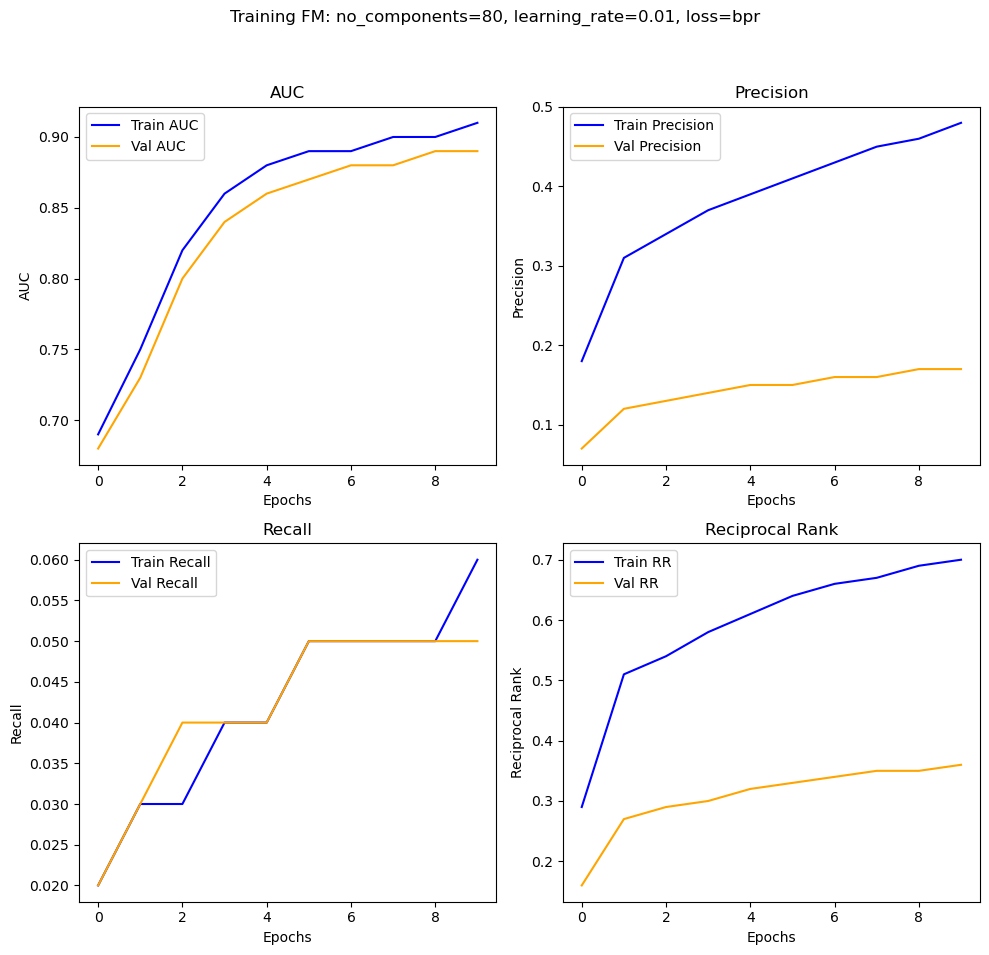

In [4]:

epochs = list(range(10))
train_auc = [0.69, 0.75, 0.82, 0.86, 0.88, 0.89, 0.89, 0.90, 0.90, 0.91]
train_precision = [0.18, 0.31, 0.34, 0.37, 0.39, 0.41, 0.43, 0.45, 0.46, 0.48]
train_recall = [0.02, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.06]
train_rr = [0.29, 0.51, 0.54, 0.58, 0.61, 0.64, 0.66, 0.67, 0.69, 0.70]
val_auc = [0.68, 0.73, 0.80, 0.84, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89]
val_precision = [0.07, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.16, 0.17, 0.17]
val_recall = [0.02, 0.03, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05]
val_rr = [0.16, 0.27, 0.29, 0.30, 0.32, 0.33, 0.34, 0.35, 0.35, 0.36]

# Creating plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Training FM: no_components=80, learning_rate=0.01, loss=bpr')

#AUC
axs[0, 0].plot(epochs, train_auc, label='Train AUC', color='blue')
axs[0, 0].plot(epochs, val_auc, label='Val AUC', color='orange')
axs[0, 0].set_title('AUC')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('AUC')
axs[0, 0].legend()

#prec
axs[0, 1].plot(epochs, train_precision, label='Train Precision', color='blue')
axs[0, 1].plot(epochs, val_precision, label='Val Precision', color='orange')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

#recall
axs[1, 0].plot(epochs, train_recall, label='Train Recall', color='blue')
axs[1, 0].plot(epochs, val_recall, label='Val Recall', color='orange')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

#rec rank
axs[1, 1].plot(epochs, train_rr, label='Train RR', color='blue')
axs[1, 1].plot(epochs, val_rr, label='Val RR', color='orange')
axs[1, 1].set_title('Reciprocal Rank')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Reciprocal Rank')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


In [11]:
best_model = joblib.load(f'ultimo_bestmodel.pkl')
val_recall = recall_at_k(best_model, val_interactions, k=5).mean()
val_precision = precision_at_k(best_model, val_interactions, k=5).mean()
val_auc = auc_score(best_model, val_interactions).mean()
val_rr = reciprocal_rank(best_model, val_interactions).mean()
k=5
print(f'val Recall@{k}: {val_recall}, val Precision@{k}: {val_precision}, val AUC: {val_auc}, val RR: {val_rr}') #9 min

val Recall@5: 0.05402437590053752, val Precision@5: 0.1709359735250473, val AUC: 0.890371561050415, val RR: 0.3585830330848694


In [10]:
best_model = joblib.load(f'ultimo_bestmodel.pkl')
test_recall = recall_at_k(best_model, test_interactions, k=5).mean()
test_precision = precision_at_k(best_model, test_interactions, k=5).mean()
test_auc = auc_score(best_model, test_interactions).mean()
test_rr = reciprocal_rank(best_model, test_interactions).mean()
k=5
print(f'Test Recall@{k}: {test_recall}, Test Precision@{k}: {test_precision}, Test AUC: {test_auc}, Test RR: {test_rr}') #9 min

Test Recall@5: 0.054241816920831486, Test Precision@5: 0.1714647114276886, Test AUC: 0.8905880451202393, Test RR: 0.3597155809402466


In [ ]:
#model = LightFM(loss='bpr', random_state=42) #logistic starts at 0.03 vs bpr at 0.04
#grid search
learning_rates = [0.005, 0.01]
no_components = [20, 40, 80]
loss_functions = ['logistic', 'bpr']

epochs = 10
patience = 3
k = 5

best_params = {}
best_val_precision = 0
best_epoch = 0


results = []

for loss in loss_functions:
    for learning_rate in learning_rates:
        for no_component in no_components:
            model = LightFM(loss=loss, learning_rate=learning_rate, no_components=no_component, random_state=42)
            patience_counter = 0
            local_best_precision = 0

            for epoch in tqdm(range(epochs), desc=f'Training {loss}-{learning_rate}-{no_component}'):
                model.fit_partial(train_interactions, epochs=1, num_threads=4)
                train_precision = precision_at_k(model, train_interactions, k=k).mean()
                val_precision = precision_at_k(model, val_interactions, k=k).mean()
                print(f'Epoch {epoch + 1}/{epochs} for config {loss}-{learning_rate}-{no_component}')
                print(f'Training Precision@{k}: {train_precision} | Validation Precision@{k}: {val_precision}')

                if val_precision > local_best_precision:
                    local_best_precision = val_precision
                    patience_counter = 0
                    if val_precision > best_val_precision:
                        best_val_precision = val_precision
                        best_params = {'loss': loss, 'learning_rate': learning_rate, 'no_components': no_component}
                        best_epoch = epoch + 1
                        
                        model_filename = f'f15_best_model_{loss}_{learning_rate}_{no_component}.pkl'
                        joblib.dump(model, model_filename)
                        print(f'Saved new best model for config {loss}-{learning_rate}-{no_component} at epoch {epoch + 1}')
                else:
                    patience_counter += 1

                if patience_counter >= patience:
                    print(f'Early stopping for config {loss}-{learning_rate}-{no_component} at epoch {epoch + 1}')
                    break
            
            results.append({
                'loss': loss,
                'learning_rate': learning_rate,
                'no_components': no_component,
                'best_precision': local_best_precision,
                'epoch': epoch + 1
            })

print(f'Best validation precision achieved with config {best_params} at epoch {best_epoch}: {best_val_precision}')
print('All results:', results)

second grid search (precision@5 on validation set): <br> 
**lr**: 0.005 and 0.01 slow but consistent learning, 0.05 too big, fast but stuck around epoch 7<br>
**loss**: no big differences <br>
**num_factors**: overrall 80 better than 40, 40 better than 20<br>

| Epoch | bpr-0.005-20 | bpr-0.005-40 | bpr-0.005-80 | bpr-0.01-20 | bpr-0.01-40 | bpr-0.01-80 | bpr-0.05-20 | **<font color='red'>bpr-0.05-40</font>** | **<font color='red'>bpr-0.05-80</font>** | warp-0.005-20 | warp-0.005-40 | warp-0.005-80 | warp-0.01-20 | warp-0.01-40 | warp-0.01-80 | warp-0.05-20 | warp-0.05-40 | **<font color='red'>warp-0.05-80</font>** |
|-------|--------------|--------------|--------------|-------------|-------------|-------------|-------------|-------------|-------------|---------------|---------------|---------------|--------------|--------------|--------------|--------------|--------------|--------------|
| 1     | 0.07334      | 0.06564      | 0.06492      | 0.07138     | 0.06979     | 0.06704     | 0.14255     | 0.14217     | 0.15007     | 0.08981       | 0.09877       | 0.08570       | 0.10576      | 0.11303      | 0.11714      | 0.14055      | 0.15008      | 0.15699      |
| 2     | 0.07257      | 0.07283      | 0.06842      | 0.11511     | 0.11742     | 0.11734     | 0.16365     | 0.17381     | 0.18441     | 0.09128       | 0.10728       | 0.08856       | 0.11404      | 0.11930      | 0.12194      | 0.15229      | 0.16565      | 0.17466      |
| 3     | 0.09281      | 0.10968      | 0.10992      | 0.12171     | 0.12415     | 0.12572     | 0.17428     | 0.18576     | 0.19163     | 0.09378       | 0.11133       | 0.09270       | 0.11795      | 0.12392      | 0.12617      | 0.15849      | 0.17370      | 0.18210      |
| 4     | 0.11346      | 0.11789      | 0.11827      | 0.12806     | 0.13181     | 0.13659     | 0.18048     | 0.19008     | 0.19351     | 0.09557       | 0.11465       | 0.09889       | 0.12189      | 0.12627      | 0.13006      | 0.16284      | 0.17823      | 0.18610      |
| 5     | 0.11699      | 0.11909      | 0.12137      | 0.13499     | 0.13829     | 0.14303     | 0.18338     | 0.19136     | 0.19490     | 0.09756       | 0.11545       | 0.10438       | 0.12366      | 0.12662      | 0.13285      | 0.16630      | 0.18116      | 0.18933      |
| 6     | 0.11946      | 0.12154      | 0.12455      | 0.13841     | 0.14190     | 0.14919     | 0.18550     | 0.19257     | 0.19464     | 0.10105       | 0.11601       | 0.11064       | 0.12498      | 0.12858      | 0.13561      | 0.16854      | 0.18278      | 0.19080      |
| 7     | 0.12168      | 0.12393      | 0.12880      | 0.14193     | 0.14519     | 0.15380     | 0.18610     | 0.19284     | 0.19436     | 0.10412       | 0.11712       | 0.11625       | 0.12646      | 0.13046      | 0.13718      | 0.17046      | 0.18457      | 0.19217      |
| 8     | 0.12377      | 0.12726      | 0.13271      | 0.14462     | 0.14831     | 0.15855     | 0.18667     | 0.19263     | 0.19404     | 0.10533       | 0.11826       | 0.11887       | 0.12779      | 0.13264      | 0.13958      | 0.17236      | 0.18617      | 0.19238      |
| 9     | 0.12590      | 0.13027      | 0.13663      | 0.14635     | 0.15134     | 0.16282     | 0.18688     | 0.19199     | -     | 0.10787       | 0.11961       | 0.12160       | 0.12931      | 0.13381      | 0.14149      | 0.17375      | 0.18669      | 0.19324      |
| 10    | 0.12926      | 0.13307      | 0.13961      | 0.14828     | 0.15394     | 0.16661     | 0.18686     | 0.19159     | -     | 0.10931       | 0.12094       | 0.12195       | 0.12994      | 0.13461      | 0.14248      | 0.17467      | 0.18824      | 0.19404      |


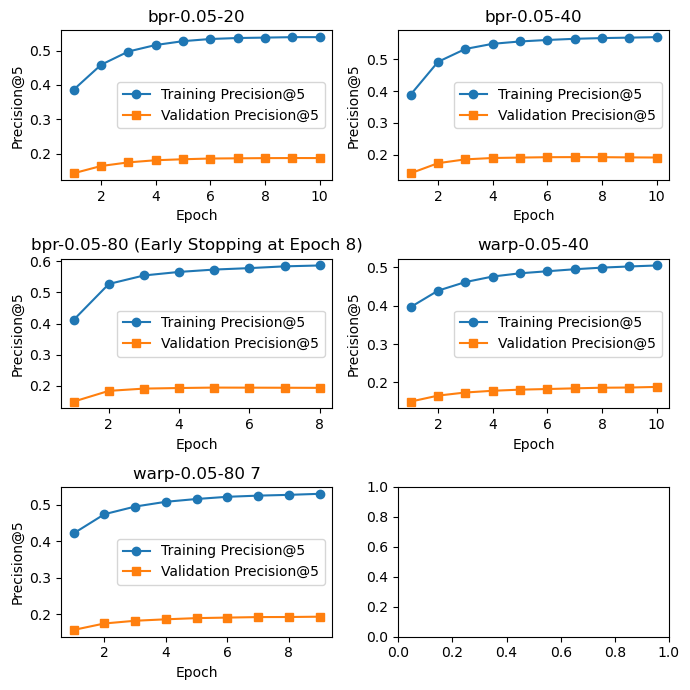

In [10]:
epochs = list(range(1, 11))
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

#bpr-0.05-20
axes[0, 0].plot(epochs, bpr_005_20_training, 'o-', label='Training Precision@5')
axes[0, 0].plot(epochs, bpr_005_20_validation, 's-', label='Validation Precision@5')
axes[0, 0].set_title('bpr-0.05-20')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Precision@5')
axes[0, 0].legend()

#bpr-0.05-40
axes[0, 1].plot(epochs, bpr_005_40_training, 'o-', label='Training Precision@5')
axes[0, 1].plot(epochs, bpr_005_40_validation, 's-', label='Validation Precision@5')
axes[0, 1].set_title('bpr-0.05-40')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Precision@5')
axes[0, 1].legend()

#bpr-0.05-80
axes[1, 0].plot(epochs[:-2], bpr_005_80_training[:-2], 'o-', label='Training Precision@5')
axes[1, 0].plot(epochs[:-2], bpr_005_80_validation[:-2], 's-', label='Validation Precision@5')
axes[1, 0].set_title('bpr-0.05-80 (Early Stopping at Epoch 8)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision@5')
axes[1, 0].legend()

#warp-0.05-40
axes[1, 1].plot(epochs, warp_005_40_training, 'o-', label='Training Precision@5')
axes[1, 1].plot(epochs, warp_005_40_validation, 's-', label='Validation Precision@5')
axes[1, 1].set_title('warp-0.05-40')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Precision@5')
axes[1, 1].legend()

#warp-0.05-80
axes[2, 0].plot(epochs[:-1], warp_005_80_training[:-1], 'o-', label='Training Precision@5')
axes[2, 0].plot(epochs[:-1], warp_005_80_validation[:-1], 's-', label='Validation Precision@5')
axes[2, 0].set_title('warp-0.05-80 7')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Precision@5')
axes[2, 0].legend()

plt.tight_layout()

plt.show()

#not much learning 

#old code w/ old datasplit----------------

First grid search results (precision@5 on val set):


| Epoch | bpr-0.001-20 | bpr-0.001-40 | bpr-0.001-80 | bpr-0.005-20 | bpr-0.005-40 | bpr-0.005-80 | bpr-0.01-20 | bpr-0.01-40 | bpr-0.01-80 | warp-0.001-20 | warp-0.001-40 | warp-0.001-80 | warp-0.005-20 | warp-0.005-40 | warp-0.005-80 | warp-0.01-20 | warp-0.01-40 | warp-0.01-80 |
|-------|--------------|--------------|--------------|--------------|--------------|--------------|-------------|-------------|-------------|---------------|---------------|---------------|---------------|---------------|---------------|--------------|--------------|--------------|
| 1     | 0.03539      | 0.03504      | 0.03539      | 0.03539      | 0.03504      | 0.03539      | 0.03540     | 0.03544     | 0.03541     | 0.03573       | 0.03608       | 0.03679       | 0.03614       | 0.03732       | 0.03612       | 0.03673      | 0.03976      | 0.03657      |
| 2     | 0.03539      | 0.03545      | 0.03539      | 0.03540      | 0.03540      | 0.03552      | 0.03571     | 0.03593     | 0.03573     | 0.03578       | 0.03695       | 0.03768       | 0.03675       | 0.03717       | 0.03672       | 0.03899      | 0.04020      | 0.03928      |
| 3     | 0.03539      | 0.03541      | 0.03539      | 0.03542      | 0.03543      | 0.03545      | 0.03836     | 0.03941     | 0.04052     | 0.03572       | 0.03729       | 0.03666       | 0.03652       | 0.03798       | 0.03968       | 0.03897      | 0.03722      | 0.03716      |
| 4     | 0.03539      | 0.03541      | 0.03539      | 0.03563      | 0.03592      | 0.03626      | 0.04167     | 0.04283     | 0.04406     | 0.03557       | 0.03772       | 0.03610       | 0.03629       | 0.04114       | 0.04036       | 0.03823      | 0.04096      | 0.04023      |
| 5     | -            | 0.03539      | -            | 0.03614      | 0.03708      | 0.03804      | 0.04446     | 0.04671     | 0.04863     | 0.03545       | 0.03774       | 0.03572       | 0.03620       | 0.04114       | 0.04025       | 0.03742      | 0.04140      | 0.04102      |
| 6     | -            | -            | -            | 0.03713      | 0.03860      | 0.03968      | 0.04756     | 0.05026     | 0.05258     | -             | 0.03768       | -             | -             | 0.04010       | 0.03751       | -            | 0.03797      | 0.04119      |   |
| 7     | -            | -            | -            | 0.03828      | 0.03972      | 0.04162      | 0.04953     | 0.05229 | 0.05504	|            - |     0.03747 | - | - | 0.04102 | 0.04012 | - | 0.03861 | 0.04368
| 8     | -            | -            | -            | 0.03925      | 0.04098     | 0.04293      | 0.05085     | 0.05412 | 0.05750 | - | 0.03732 |-|-|0.04073|-|-|0.03862| 0.04190
| 9     | -            | -            | -            | 0.04046     | 0.04199      | 0.04443      | 0.05230	     | 0.05579 | 0.05931 | -| -|-|-|-|-|-|-| 0.04328
| 10    | -            | -            | -            | 0.04137      | 0.04339      | 0.04608      | 0.05354     | 0.05738 | **<font color='red'>0.06121</font>** | -| -|-|-|-|-|-|-|0.04296

In [6]:
best_model = joblib.load(f'best_model_bpr_0.01_80.pkl')
val_recall = recall_at_k(best_model, val_interactions, k=5).mean()
val_auc = auc_score(best_model, val_interactions).mean()
print(f'Validation Recall@{k}: {val_recall}, Validation AUC: {val_auc}') #9 min

Validation Recall@5: 0.011959579800440531, Validation AUC: 0.3448621928691864


Sources: [LightFM doc](https://making.lyst.com/lightfm/docs/home.html#:~:text=LightFM%20is%20a%20Python%20implementation,the%20traditional%20matrix%20factorization%20algorithms.) -[kagglenotebook](https://www.kaggle.com/code/parthplc/interview-building-recommendation-system-lightfm) -[githubissue](https://github.com/lyst/lightfm/issues/229)